In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/ML Project Dataset/BostonHousingDataset/BostonHousing.csv'

In [4]:
housing = pd.read_csv(file_path)

In [5]:
housing.head(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [6]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
housing.shape

(506, 14)

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

**Our machine learning objective is to predict median value of owner-occupied homes(medv) based on the other fatures.**

**The target variable is continuous so it is a regression task**

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
housing.columns.isnull().sum()

0

**There is no missing value in the dataset**

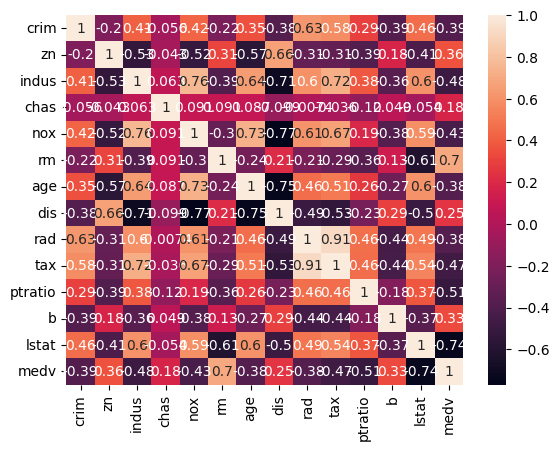

In [11]:
# Correlation matrix
correlation_matrix = housing.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [12]:
correlation_matrix['medv']

,medv
crim,-0.388305
zn,0.360445
indus,-0.483725
chas,0.175260
nox,-0.427321
rm,0.695360
age,-0.376955
dis,0.249929
rad,-0.381626
tax,-0.468536


**It seems that medv is highly correlated with rm(average number of rooms per dwelling)**

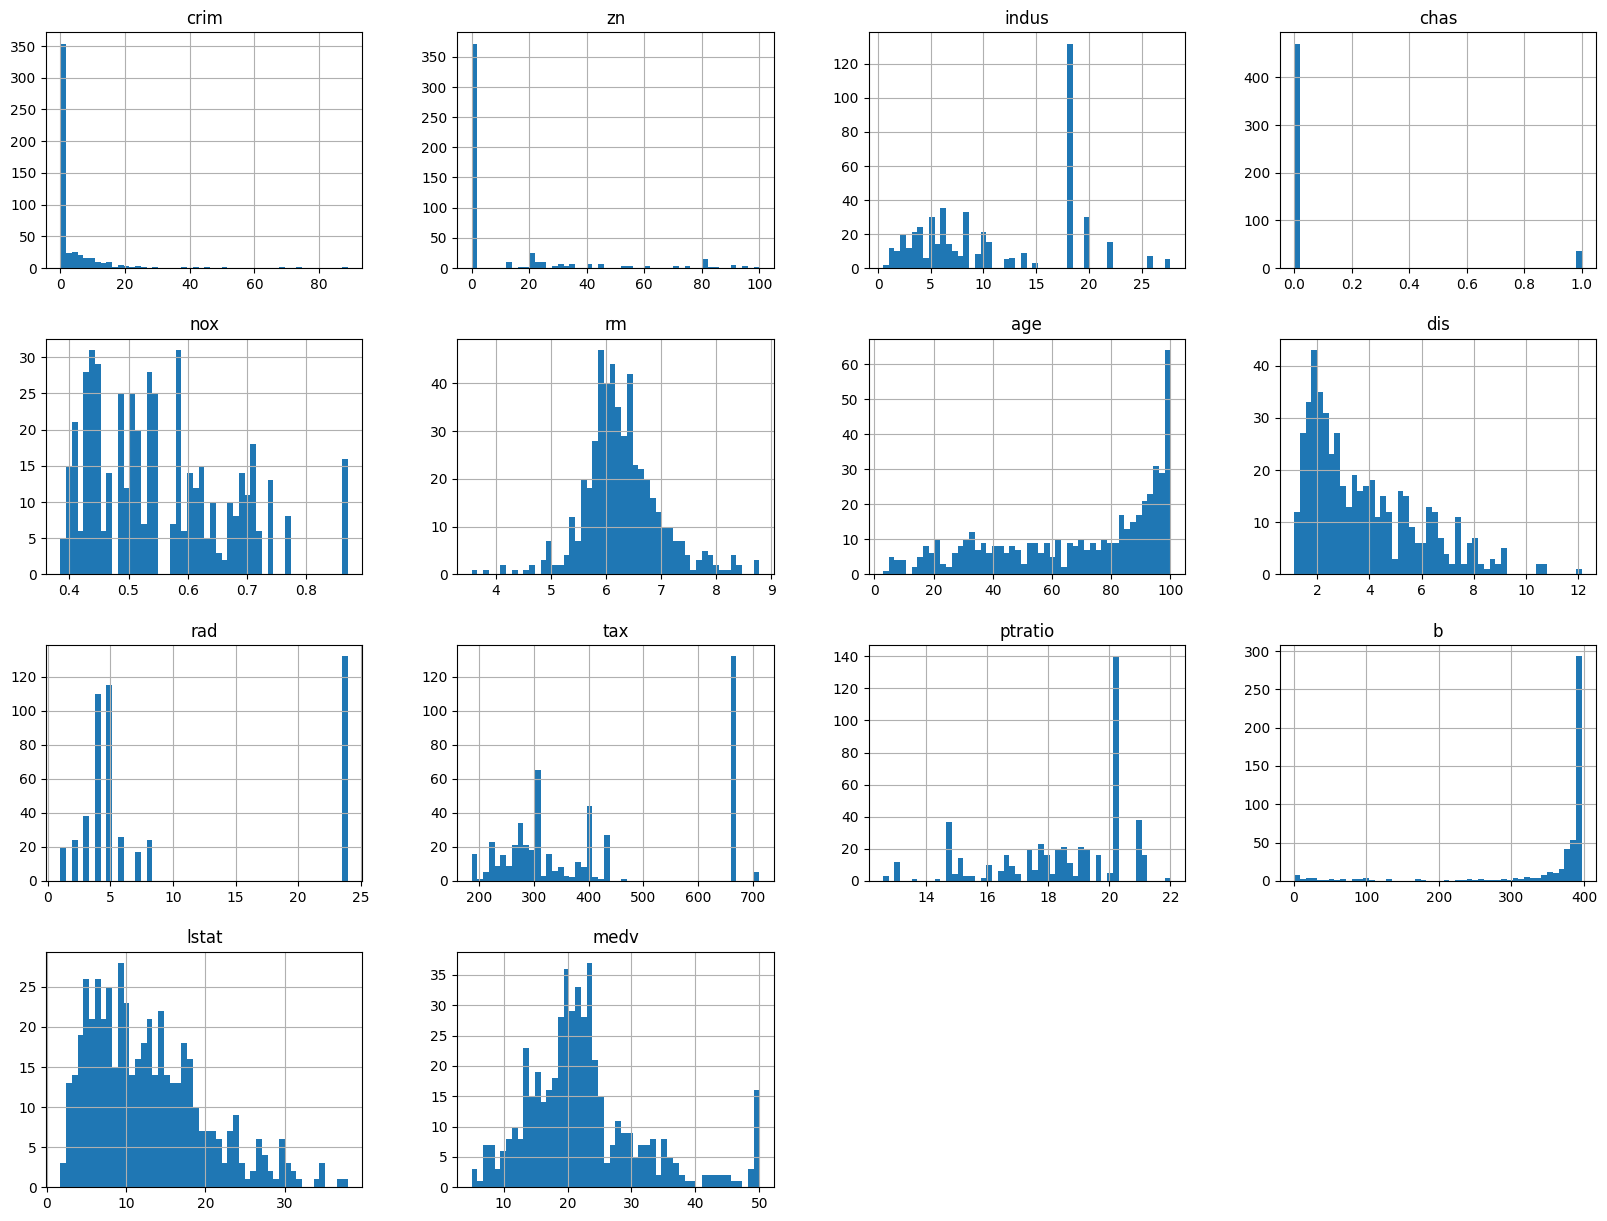

In [13]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

*The distribution of rm and medv is pretty much close to uniform distribution.*

*Distribution of age and dis is left and right skewed respectively.*

*There are some multimodal distribution here seemingly.*


In [14]:
import numpy as np
def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [16]:
len(train_set)

405

In [17]:
len(test_set)

101

In [18]:
np.random.seed(42)

In [19]:
# let't write a code to maintain the integrity of the test set at every time we re-run the code
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [20]:
# Creating a new index column
housing['index'] = housing.index

In [21]:
# Now you can use 'index' column for consistent splitting
train_set, test_set = split_data_with_id_hash(housing, 0.2, 'index')

In [22]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [23]:
unique_rad_values = housing['rad'].unique()
print(unique_rad_values)

[ 1  2  3  5  4  8  6  7 24]


In [24]:
element_counts = housing['rad'].value_counts()
print(element_counts)

rad
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64


In [25]:
housing['rad_cat'] = pd.cut(housing['rad'], bins=[0, 5, 10, np.inf], labels=[1,  2, 3])

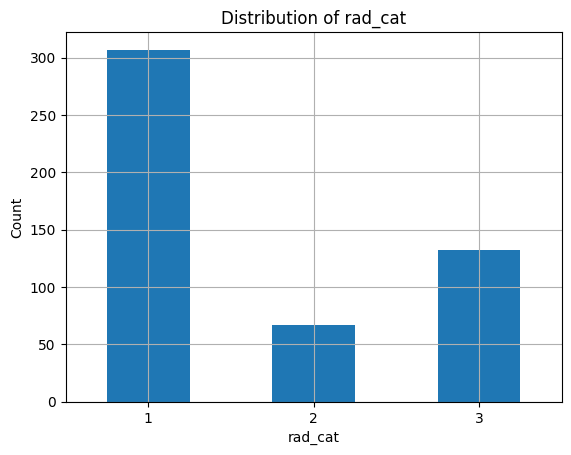

In [26]:
housing['rad_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('rad_cat')
plt.ylabel('Count')
plt.title('Distribution of rad_cat')
plt.show()

In [27]:
# Having multiple split is good for estimation
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing['rad_cat']):
  strat_train_set_n = housing.loc[train_index]
  strat_test_set_n = housing.loc[test_index]
  strat_splits.append((strat_train_set_n, strat_test_set_n))



In [28]:
strat_train_set, strat_test_set = strat_splits[0]

In [29]:
# Shorter way of stratified spliting
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['rad_cat'])

In [30]:
strat_test_set['rad_cat'].value_counts() / len(strat_test_set)

,count
rad_cat,
1,0.607843
3,0.264706
2,0.127451


In [31]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('rad_cat', axis=1, inplace=True)

Here is no different classes for any feature so StratifiedShuffleSplit is not needed here

In [32]:
housing = train_set.copy()

In [33]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    int64  
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    int64  
 9   tax      404 non-null    int64  
 10  ptratio  404 non-null    float64
 11  b        404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
 14  index    404 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 50.5 KB


In [34]:
corr_matrix = housing.corr(numeric_only=True)

In [35]:
corr_matrix['medv'].sort_values(ascending=False)

,medv
medv,1.000000
rm,0.710680
b,0.339918
zn,0.309504
dis,0.235114
chas,0.190642
index,-0.212602
age,-0.340216
crim,-0.380091
rad,-0.387467


Here medv is highly correlated with rm, b, zn, dis, chas

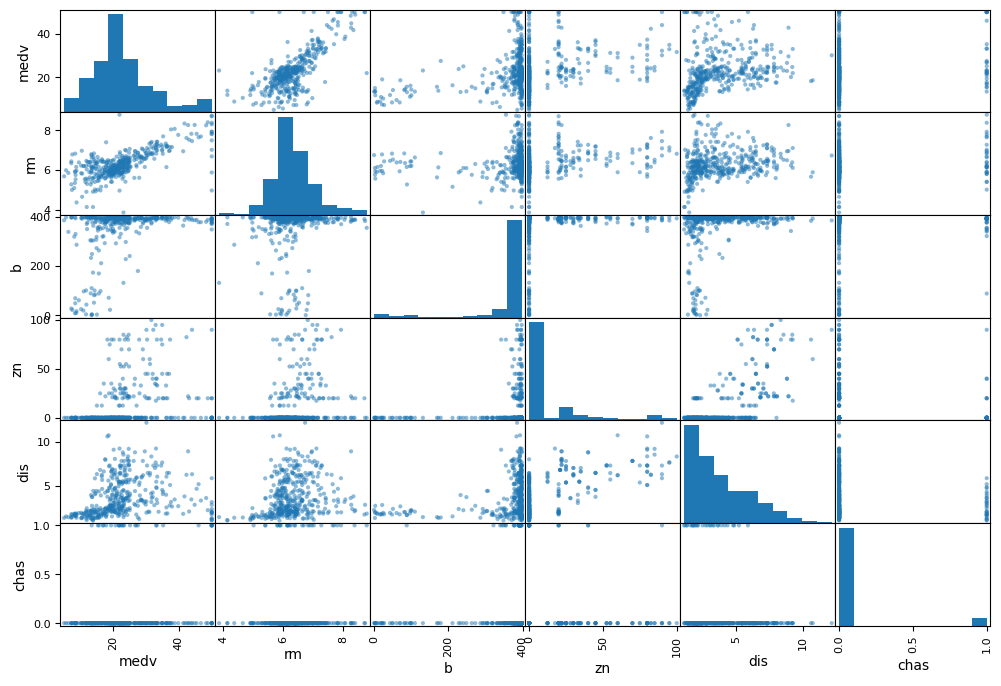

In [36]:
from pandas.plotting import scatter_matrix
attributes = ['medv', 'rm', 'b', 'zn', 'dis', 'chas']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

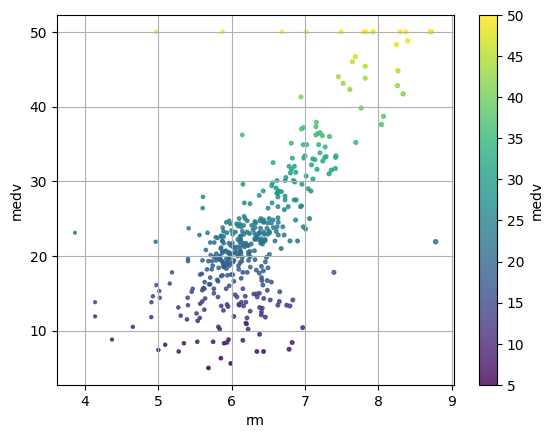

In [37]:
housing.plot(kind='scatter', x='rm', y='medv', s='rm', c='medv', grid=True, alpha=0.8)
plt.show()

In [38]:
housing = strat_train_set.drop(['medv', 'index'], axis=1)

In [39]:
housing_labels = strat_train_set['medv'].copy()

In [40]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 472 to 174
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    int64  
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    int64  
 9   tax      404 non-null    int64  
 10  ptratio  404 non-null    float64
 11  b        404 non-null    float64
 12  lstat    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [41]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat


In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [43]:
housing_num = housing.select_dtypes(include=[np.number])

In [44]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [45]:
imputer.statistics_

array([2.52775e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.21750e+00, 7.68500e+01, 3.16750e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.91260e+02, 1.13950e+01])

In [46]:
housing_num.median().values

array([2.52775e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.21750e+00, 7.68500e+01, 3.16750e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.91260e+02, 1.13950e+01])

In [47]:
X = imputer.transform(housing_num)

In [48]:

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [49]:
housing_tr.loc[null_rows_idx].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat


In [50]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [51]:
outlier_pred

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

If we want to drop the outlier we would run the following code:

In [52]:
#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

**Scalling**

In [53]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [54]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
housing_num_std_scaled = standard_scaler.fit_transform(housing_num)

In [55]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[['rm']], scaled_labels)

some_new_data = housing[['rm']].iloc[:5]
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [56]:
print(predictions)

[[23.76913412]
 [18.52381323]
 [22.85142789]
 [23.73314564]
 [19.0546433 ]]


**The code trains a linear regression model to predict house prices (medv) based on the average number of rooms (rm). It then uses this model to make predictions for new data and scales the predictions back to the original units.**

In [57]:
# Simpler version of the above code-
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(regressor=LinearRegression(),
                                  transformer=StandardScaler())

model.fit(housing[['rm']], housing_labels)
predictions = model.predict(some_new_data)


In [58]:
print(predictions)

[23.76913412 18.52381323 22.85142789 23.73314564 19.0546433 ]


**Custom Transformer**

In [59]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["dis"]])

In [60]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["age"]], [[35]], gamma=0.1)

In [61]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["age"]])

In [62]:
#age_simil_35

In [63]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [65]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [66]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["rad", "dis"]],
                                           sample_weight=housing_labels)

In [67]:
similarities[:3].round(2)

array([[0.57, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.94, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.37, 0.02, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  ]])

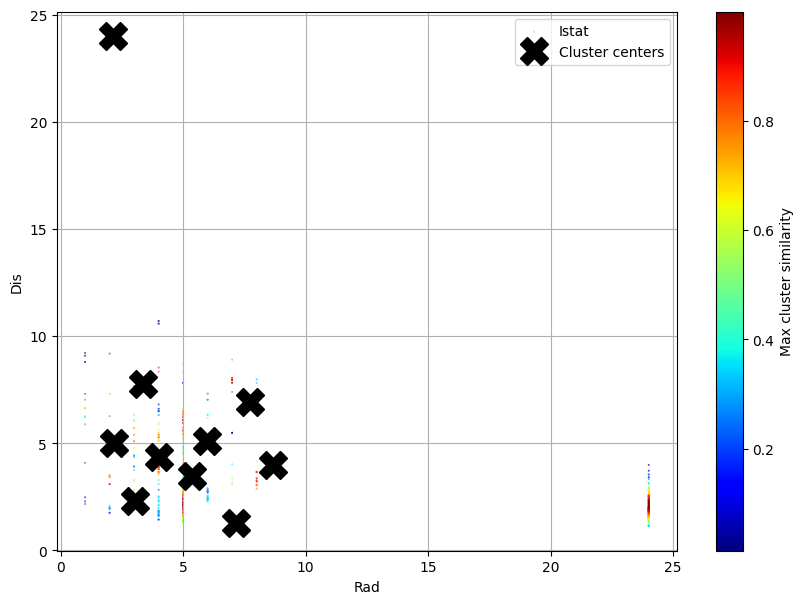

In [68]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "rad": "Rad", "dis": "Dis",
    "lstat": "Lstat",
    "medv": "median value of owner-occupied homes in $1000's"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Rad", y="Dis", grid=True,
                     s=housing_renamed["Lstat"] / 100, label="Istat",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
#save_fig("district_cluster_plot")
plt.show()

In [69]:
# Transformation Pipeline
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('standardize', StandardScaler())
])

In [70]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

In [71]:
# Transforming the numerical data of housing dataset
housing_num_prepared = num_pipeline.fit_transform(housing_num)

In [72]:
housing_num_prepared[:2].round(2)

array([[ 0.02, -0.5 ,  1.  , -0.28,  0.2 ,  0.24,  0.23, -0.42,  1.67,
         1.53,  0.81,  0.42,  0.22],
       [ 1.28, -0.5 ,  1.  , -0.28,  1.56, -0.6 ,  0.99, -0.9 ,  1.67,
         1.53,  0.81, -1.19,  1.53]])

In [73]:
# Retriving a dataframe from prepared/transform numerical data of housing dataset
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index=housing_num.index)

In [74]:
df_housing_num_prepared.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
472,0.023094,-0.504358,1.002683,-0.278089,0.200429,0.238657,0.226610,-0.422890,1.666146,1.531672,0.812502,0.416656,0.224568
444,1.279145,-0.504358,1.002683,-0.278089,1.557817,-0.600982,0.994744,-0.897958,1.666146,1.531672,0.812502,-1.186411,1.526821
135,-0.386479,-0.504358,1.549577,-0.278089,0.573711,0.091756,1.051643,-0.795862,-0.636704,0.156504,1.267459,0.430290,0.583620
248,-0.439992,0.437987,-0.763539,-0.278089,-1.063639,0.232896,-0.694441,1.917090,-0.291276,-0.486041,0.312051,0.220953,-0.443821
112,-0.445583,-0.504358,-0.164698,-0.278089,-0.079532,-0.516010,0.863166,-0.680667,-0.406419,0.126479,-0.279393,0.433227,0.480047


In [75]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [76]:
num_pipeline[1]

StandardScaler()

In [77]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [78]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [79]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

**Pipeline support indexing**

**We don't have any categorical attribute so we didn't transformed any categorical attribute. However if we had any categorical attribute then we would have encode the attribute i.e using OneHotEncoder. Then we would get a sparse matrix and we could transform the sparse matrix into a numpy array using .toarray(). After that if we needed to know about which features we have encoded then we could use .feature_names_in_. We could also get the categories of the encoded feature by .feature_names_out(). Findally , we could make a Dataframe out of the encoded categorical feature by usin pd.Dataframe()**

In [80]:
housing_cat = housing[['chas']]

In [81]:
# Transformation Pipeline for categorical attribute
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

In [82]:
# let us combine num_pipeline and cat_pipeline
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([
    ('num', num_pipeline, housing_num.columns),
    ('cat', cat_pipeline, housing_cat.columns)
])

In [83]:
# Easy implementation of the above code
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [84]:
# Now let's fit and transform the full training set using the combined transformer called preprocessing
housing_prepared = preprocessing.fit_transform(housing)

In [85]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
#from sklearn.cluster import ClusterSimilarity # Assuming this is for 'cluster_simil'
# Add the following import if 'cat_pipeline' refers to a categorical pipeline you defined earlier
from sklearn.preprocessing import OneHotEncoder
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
    ('num', num_pipeline, housing_num.columns),
    ('cat', cat_pipeline, housing_cat.columns)
])
#remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [86]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(404, 15)

In [87]:
preprocessing.get_feature_names_out()

array(['num__crim', 'num__zn', 'num__indus', 'num__chas', 'num__nox',
       'num__rm', 'num__age', 'num__dis', 'num__rad', 'num__tax',
       'num__ptratio', 'num__b', 'num__lstat', 'cat__chas_0',
       'cat__chas_1'], dtype=object)

In [88]:
df_preprocessed = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)

In [89]:
df_preprocessed.head()

,num__crim,num__zn,num__indus,num__chas,num__nox,num__rm,num__age,num__dis,num__rad,num__tax,num__ptratio,num__b,num__lstat,cat__chas_0,cat__chas_1
472,0.023094,-0.504358,1.002683,-0.278089,0.200429,0.238657,0.226610,-0.422890,1.666146,1.531672,0.812502,0.416656,0.224568,1.0,0.0
444,1.279145,-0.504358,1.002683,-0.278089,1.557817,-0.600982,0.994744,-0.897958,1.666146,1.531672,0.812502,-1.186411,1.526821,1.0,0.0
135,-0.386479,-0.504358,1.549577,-0.278089,0.573711,0.091756,1.051643,-0.795862,-0.636704,0.156504,1.267459,0.430290,0.583620,1.0,0.0
248,-0.439992,0.437987,-0.763539,-0.278089,-1.063639,0.232896,-0.694441,1.917090,-0.291276,-0.486041,0.312051,0.220953,-0.443821,1.0,0.0
112,-0.445583,-0.504358,-0.164698,-0.278089,-0.079532,-0.516010,0.863166,-0.680667,-0.406419,0.126479,-0.279393,0.433227,0.480047,1.0,0.0


In [90]:
df_preprocessed.shape

(404, 15)

Training and evaluating training set

In [91]:
#Train and evaluate on training set
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['chas'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [92]:
housing_predictions = lin_reg.predict(housing)

In [93]:
housing_predictions[:5]#-2 = rounded to nearest hundread

array([21.79622578, 11.41672579, 17.29347124, 21.27511245, 20.41245372])

In [94]:
housing_labels.iloc[:5].values

array([23.2, 10.8, 18.1, 24.5, 18.8])

In [95]:
# extra code – computes the error ratios
error_ratios = housing_predictions[:5] / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-6.1%, 5.7%, -4.5%, -13.2%, 8.6%


In [96]:
from sklearn.metrics import mean_squared_error
lin_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))

In [97]:
lin_rmse

4.488890853534838

In [98]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['chas'], dtype='object'))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [99]:
housing_predictions = tree_reg.predict(housing)

In [100]:
tree_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))

In [101]:
tree_rmse

0.0

May be decision tree is overfitting

In [102]:
# Cross validation
from sklearn.model_selection import cross_val_score

tree_rmse = -cross_val_score(tree_reg, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)

In [103]:
pd.Series(tree_rmse).describe()

,0
count,10.000000
mean,4.026475
std,0.869940
min,2.796382
25%,3.385957
50%,3.922984
75%,4.747653
max,5.251333


In [104]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,4.592689
std,0.928662
min,3.119312
25%,4.121215
50%,4.433473
75%,5.189129
max,6.122020


In [105]:
# Ensembling trees
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)

In [106]:
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,3.280790
std,1.032845
min,2.026157
25%,2.299214
50%,3.372379
75%,3.978685
max,4.892076


In [107]:
print(forest_rmses)

[4.4968304  4.8920755  2.18314176 3.22789054 4.07827039 3.51686777
 2.64743109 3.67993042 2.0593023  2.02615663]


Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [108]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmses = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
pd.Series(forest_rmses).describe()

,0
count,1.000000
mean,1.271482
std,NaN
min,1.271482
25%,1.271482
50%,1.271482
75%,1.271482
max,1.271482


The rmse is significantly small. So, there is a high chance of overfitting the data. Another posibility is mismathch in dataset.

In [109]:
'''#GridSearch
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__num__imputer__strategy': ['median', 'mean'],
     'preprocessing__cat__onehot__sparse_output': [True, False],
     'random_forest__max_features': [4, 6, 8]},
    # ... other parameter combinations ...
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)'''

'#GridSearch\nfrom sklearn.model_selection import GridSearchCV\n\nfull_pipeline = Pipeline([\n    ("preprocessing", preprocessing),\n    ("random_forest", RandomForestRegressor(random_state=42)),\n])\nparam_grid = [\n    {\'preprocessing__num__imputer__strategy\': [\'median\', \'mean\'],\n     \'preprocessing__cat__onehot__sparse_output\': [True, False],\n     \'random_forest__max_features\': [4, 6, 8]},\n    # ... other parameter combinations ...\n]\ngrid_search = GridSearchCV(full_pipeline, param_grid, cv=3,\n                           scoring=\'neg_root_mean_squared_error\')\ngrid_search.fit(housing, housing_labels)'

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor  # Or any other model you want to use

# Assuming we have defined 'preprocessing', 'housing', and 'housing_labels'

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    # Explore different parameter combinations
    {
        'preprocessing__num__simpleimputer__strategy': ['median', 'mean'],
        'preprocessing__cat__onehotencoder__sparse_output': [True, False],
        'random_forest__n_estimators': [100, 200],
        'random_forest__max_features': ['sqrt', 'log2'],
    },
    # Add more parameter combinations as needed
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

grid_search.fit(housing, housing_labels)

# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

Best parameters: {'preprocessing__cat__onehotencoder__sparse_output': True, 'preprocessing__num__simpleimputer__strategy': 'median', 'random_forest__max_features': 'sqrt', 'random_forest__n_estimators': 200}
Best score: -3.2936653846018396


In [111]:
grid_search.best_params_

{'preprocessing__cat__onehotencoder__sparse_output': True,
 'preprocessing__num__simpleimputer__strategy': 'median',
 'random_forest__max_features': 'sqrt',
 'random_forest__n_estimators': 200}

In [112]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['chas'], dtype='object'))])),
                ('random_forest',
                 RandomForestRegressor(max_features='sqrt', n_estimators=200,
                                       random_state=42))])

In [113]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# Select relevant columns for display
cv_res = cv_res[[
    "param_preprocessing__num__simpleimputer__strategy",
    "param_preprocessing__cat__onehotencoder__sparse_output",
    "param_random_forest__n_estimators",
    "param_random_forest__max_features",
    "split0_test_score",
    "split1_test_score",
    "split2_test_score",
    "split3_test_score",
    "split4_test_score",
    "mean_test_score",
]]

# Rename columns for better readability
score_cols = ["split0", "split1", "split2", "split3", "split4", "mean_test_rmse"]
cv_res.columns = [
    "num_imputer_strategy",
    "cat_onehot_sparse",
    "n_estimators",
    "max_features",
] + score_cols

# Convert scores to positive RMSE values and round
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,num_imputer_strategy,cat_onehot_sparse,n_estimators,max_features,split0,split1,split2,split3,split4,mean_test_rmse
1,median,True,200,sqrt,5,3,4,3,2,3
3,median,True,200,log2,5,3,4,3,2,3
5,mean,True,200,sqrt,5,3,4,3,2,3
7,mean,True,200,log2,5,3,4,3,2,3
9,median,False,200,sqrt,5,3,4,3,2,3


In [114]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'preprocessing__num__simpleimputer__strategy': ['median', 'mean'],
    'preprocessing__cat__onehotencoder__sparse_output': [True, False],
    'random_forest__n_estimators': randint(low=100, high=200),
    'random_forest__max_features': randint(low=2, high=20),
}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=5,
    scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('simpl...
                   param_distributions={'preprocessing__cat__onehotencoder__sparse_output': [True,
                                                                                             False],
                                        'preprocessing__num__simpleimputer__strategy': ['median',
                                                                                        'mean'],
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d38947690f0>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d3894769120>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [116]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# Select relevant columns for display
cv_res = cv_res[[
    "param_preprocessing__num__simpleimputer__strategy",
    "param_preprocessing__cat__onehotencoder__sparse_output",
    "param_random_forest__n_estimators",
    "param_random_forest__max_features",
    "split0_test_score",
    "split1_test_score",
    "split2_test_score",
    "split3_test_score",
    "split4_test_score",
    "mean_test_score",
]]

# Rename columns for better readability
score_cols = ["split0", "split1", "split2", "split3", "split4", "mean_test_rmse"]
cv_res.columns = [
    "num_imputer_strategy",
    "cat_onehot_sparse",
    "n_estimators",
    "max_features",
] + score_cols

# Convert scores to positive RMSE values and round
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,num_imputer_strategy,cat_onehot_sparse,n_estimators,max_features,split0,split1,split2,split3,split4,mean_test_rmse
1,median,True,182,8,5,3,4,3,2,3
5,mean,False,101,7,5,3,4,3,2,3
3,mean,True,123,9,5,3,4,3,2,3
8,median,True,191,11,5,3,4,3,2,3
2,median,True,187,12,5,3,4,3,2,3


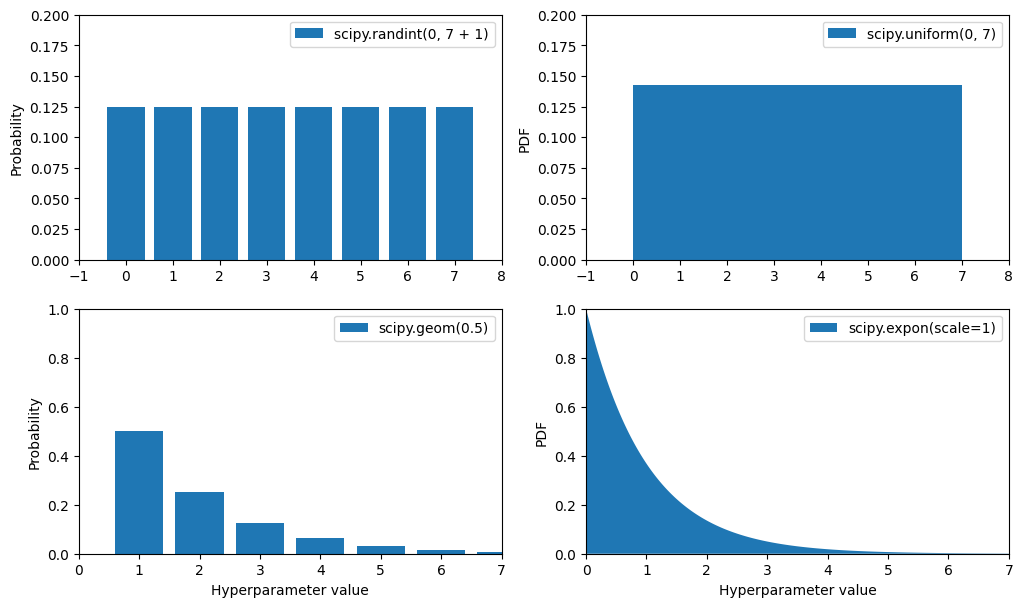

In [117]:
# extra code – plots a few distributions you can use in randomized search

from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

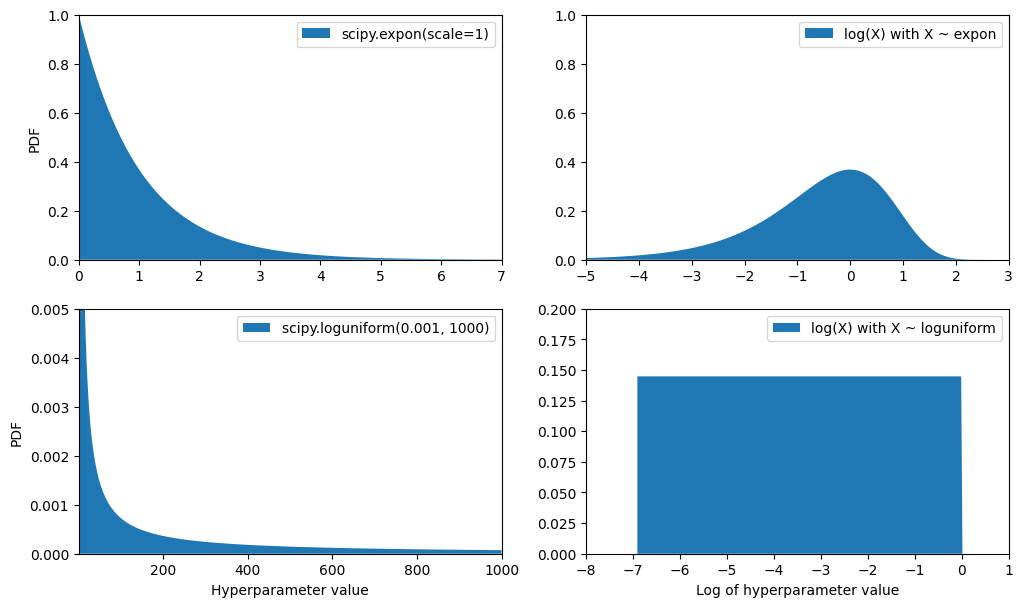

In [118]:
# extra code – shows the difference between expon and loguniform

from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

**Analyze the best model**

In [119]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.05, 0.  , 0.05, 0.  , 0.05, 0.41, 0.02, 0.04, 0.  , 0.02, 0.05,
       0.02, 0.3 , 0.  , 0.  ])

In [120]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.4077958814054649, 'num__rm'),
 (0.29519829660196206, 'num__lstat'),
 (0.04817672967220603, 'num__nox'),
 (0.0478483764627406, 'num__indus'),
 (0.046808564596275117, 'num__crim'),
 (0.04587547267702071, 'num__ptratio'),
 (0.04445945199728427, 'num__dis'),
 (0.023476798291539456, 'num__tax'),
 (0.016130611983252795, 'num__b'),
 (0.015254670738212656, 'num__age'),
 (0.00419771325012974, 'num__rad'),
 (0.0018697779304990834, 'num__zn'),
 (0.0010110520110135789, 'cat__chas_0'),
 (0.0009983807003375513, 'cat__chas_1'),
 (0.0008982216820613225, 'num__chas')]

In [121]:
X_test = strat_test_set.drop("medv", axis=1)
y_test = strat_test_set["medv"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print(final_rmse)

4.032431480172394


We can compute a 95% confidence interval for the test RMSE

In [122]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.87659466, 4.92404412])

**

In [123]:
# extra code – shows how to compute a confidence interval for the RMSE
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(2.876594657346587, 4.92404411656676)

Save the final model

In [124]:
import joblib

joblib.dump(final_model, "Boston_housing_model.pkl")

['Boston_housing_model.pkl']

In [125]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("Boston_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [126]:
predictions

array([21.69945055, 10.65659341, 17.71923077, 23.78296703, 19.01813187])